In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

In [137]:
brands=[]
prices=[]
display=[]
panel_type = []
brightness=[]
screen_resolution = []
response_time = []
refresh_rate = []
for i in range(1,17):
    print("https://www.flipkart.com/search?q=monitors&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page="+str(i))
    urls="https://www.flipkart.com/search?q=monitors&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page="+str(i)
    page=requests.get(urls)
    soup = BeautifulSoup(page.text,"html.parser")

    data=soup.find_all("div",class_="KzDlHZ")
    #brands
    for i in data:
        brands.append(re.findall(r'^[A-Za-z]+',i.text)[0])
        
    #display
    for i in data:
        match = re.findall(r'(\d{2,3}(?:\.\d{1,2})?)\s*cm', i.text)
        if match:
            display.append(match[0])
        else:
            display.append(np.nan)


    #prices
    b=soup.find_all('div',class_='Nx9bqj _4b5DiR')
    for i in b:
        prices.append(i.text)             

    all_products = soup.find_all('div', class_='_6NESgJ')

    for each_product in all_products:
        features = each_product.find_all('li', class_='J+igdf')

        # Panel Type
        found = None
        for f in features:
            match = re.findall(r'Panel Type:\s*([A-Za-z\s]+Panel)', f.text)
            if match:
                found = match[0]
                break
        panel_type.append(found if found else np.nan)

        # Screen Resolution
        found = None
        for f in features:
            match = re.findall(r'Screen Resolution Type:\s*([A-Za-z0-9\s]+)', f.text)
            if match:
                found = match[0]
                break
        screen_resolution.append(found if found else np.nan)

        # Response Time
        found = None
        for f in features:
            match = re.findall(r'Response Time:\s*(\d+)\s*ms', f.text)
            if match:
                found = match[0]
                break
        response_time.append(found if found else np.nan)

        # Refresh Rate
        found = None
        for f in features:
            match = re.findall(r'Refresh Rate:\s*(\d+)\s*Hz', f.text)
            if match:
                found = match[0]
                break
        refresh_rate.append(found if found else np.nan)

        #brightness
        found = None
        for f in features:
            match = re.findall(r'Brightness:\s*(\d+)\s*nits', f.text)
            if match:
                found = match[0]
                break
        brightness.append(found if found else np.nan)


    

https://www.flipkart.com/search?q=monitors&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=1
https://www.flipkart.com/search?q=monitors&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=2
https://www.flipkart.com/search?q=monitors&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=3
https://www.flipkart.com/search?q=monitors&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=4
https://www.flipkart.com/search?q=monitors&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=5
https://www.flipkart.com/search?q=monitors&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=6
https://www.flipkart.com/search?q=monitors&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-

In [138]:
max_len = max(len(brands), len(prices), len(display),
               len(panel_type), len(brightness),
               len(screen_resolution), len(response_time),
               len(refresh_rate))

# pad each list with NaN if it's shorter
def pad_list(lst):
    return lst + [np.nan] * (max_len - len(lst))

brands = pad_list(brands)
prices = pad_list(prices)
display = pad_list(display)
panel_type = pad_list(panel_type)
brightness = pad_list(brightness)
screen_resolution = pad_list(screen_resolution)
response_time = pad_list(response_time)
refresh_rate = pad_list(refresh_rate)

In [165]:
d={"Brands":brands,
   "Price":prices,
   "Panel_Type":panel_type,
   "Display":display,
   "Screen_Resolution":screen_resolution,
   "Brightness":brightness,
   "Response_Time":response_time,
   "Refresh_Rate":refresh_rate,}

In [70]:
len(prices)

384

In [166]:
df = pd.DataFrame(d)
df

,Brands,Price,Panel_Type,Display,Screen_Resolution,Brightness,Response_Time,Refresh_Rate
0,DELL,"₹5,999",TN Panel,50.8,HD,NaN,5,60
1,DELL,"₹8,899",IPS Panel,60.96,Full HD,250,5,100
2,DELL,"₹10,399",IPS Panel,68.58,Full HD,250,5,100
3,MarQ,"₹5,999",IPS Panel,60.96,Full HD,NaN,1,100
4,ZEBSTER,"₹2,699",VA Panel,50.8,HD,400,8,60
...,...,...,...,...,...,...,...,...
379,LG,"₹1,55,000",IPS Panel,86.36,Full HD,400,5,100
380,ASUS,"₹17,679",OLED Panel,81.28,4K Ultra HD,NaN,NaN,240
381,sugra,"₹13,165",NaN,NaN,NaN,NaN,NaN,NaN
382,GIGABYTE,"₹40,999",IPS Panel,68.58,Full HD,NaN,1,165


In [167]:
df.to_csv("result.csv")

In [ ]:
#Data Cleaning

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brands             384 non-null    object
 1   Price              383 non-null    object
 2   Panel_Type         371 non-null    object
 3   Display            381 non-null    object
 4   Screen_Resolution  381 non-null    object
 5   Brightness         299 non-null    object
 6   Response_Time      363 non-null    object
 7   Refresh_Rate       380 non-null    object
dtypes: object(8)
memory usage: 24.1+ KB


In [169]:
df.dropna(inplace=True)

In [170]:
df

,Brands,Price,Panel_Type,Display,Screen_Resolution,Brightness,Response_Time,Refresh_Rate
1,DELL,"₹8,899",IPS Panel,60.96,Full HD,250,5,100
2,DELL,"₹10,399",IPS Panel,68.58,Full HD,250,5,100
4,ZEBSTER,"₹2,699",VA Panel,50.8,HD,400,8,60
5,Frontech,"₹2,089",VA Panel,43.18,HD,250,5,60
6,MarQ,"₹7,499",VA Panel,68.58,Full HD,300,1,100
...,...,...,...,...,...,...,...,...
374,EIZO,"₹32,699",IPS Panel,71.12,Quad HD,350,5,60
375,Samsung,"₹44,999",VA Panel,81.28,4K Ultra HD,300,5,60
377,DELL,"₹9,099",IPS Panel,68.58,WQHD,350,5,100
378,AOC,"₹30,299",VA Panel,60.45,Full HD,250,6,75


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281 entries, 1 to 379
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brands             281 non-null    object
 1   Price              281 non-null    object
 2   Panel_Type         281 non-null    object
 3   Display            281 non-null    object
 4   Screen_Resolution  281 non-null    object
 5   Brightness         281 non-null    object
 6   Response_Time      281 non-null    object
 7   Refresh_Rate       281 non-null    object
dtypes: object(8)
memory usage: 19.8+ KB


In [172]:
df['Price']=df['Price'].str.replace("₹","").str.replace(",","")

In [175]:
df['Price']=df['Price'].astype('int32')

In [174]:
df['Display']=df['Display'].astype('float16')

In [176]:
df['Response_Time']=df['Response_Time'].astype('int32')

In [177]:
df['Refresh_Rate']=df['Refresh_Rate'].astype('int32')

In [178]:
df['Brightness']=df['Brightness'].astype('int32')

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281 entries, 1 to 379
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brands             281 non-null    object 
 1   Price              281 non-null    int32  
 2   Panel_Type         281 non-null    object 
 3   Display            281 non-null    float16
 4   Screen_Resolution  281 non-null    object 
 5   Brightness         281 non-null    int32  
 6   Response_Time      281 non-null    int32  
 7   Refresh_Rate       281 non-null    int32  
dtypes: float16(1), int32(4), object(3)
memory usage: 13.7+ KB


In [ ]:
#Data Analysis

In [181]:
#COUNT OF EACH BEANDS
df['Brands'].value_counts()

Brands
DELL         82
Samsung      35
Acer         24
Frontech     23
LG           17
EIZO         16
BenQ         13
ZEBRONICS    12
ASUS         10
Enter         8
MSI           7
ViewSonic     6
ZEBSTER       6
Lenovo        5
MarQ          4
Arzopa        3
rionix        2
PHILIPS       2
HP            2
Foxin         1
FINGERS       1
Techoprac     1
AOC           1
Name: count, dtype: int64

In [223]:
#how many brands are there
df['Brands'].nunique()

23

In [182]:
#COUNT OF EACH PANEL_TYPE
df['Panel_Type'].value_counts()

Panel_Type
IPS Panel    164
VA Panel     105
TN Panel      12
Name: count, dtype: int64

In [183]:
#COUNT OF EACH SCREEN_RESOLUTION
df['Screen_Resolution'].value_counts()

Screen_Resolution
Full HD        174
4K Ultra HD     34
HD              33
WUXGA           15
Quad HD         14
WQHD             7
WFHD             2
DQHD             2
Name: count, dtype: int64

In [184]:
df['Price'].describe()

count       281.000000
mean      17906.466192
std       21109.671591
min        2089.000000
25%        7999.000000
50%       10599.000000
75%       19699.000000
max      199992.000000
Name: Price, dtype: float64

In [185]:
#AVERAGE PRICE OF EACH BRAND
df.groupby('Brands')['Price'].mean()

Brands
AOC           30299.000000
ASUS          24659.100000
Acer          11214.125000
Arzopa        12856.666667
BenQ          22651.538462
DELL          15625.097561
EIZO          43589.187500
Enter          3374.375000
FINGERS       18499.000000
Foxin          2601.000000
Frontech       5218.260870
HP            10569.500000
LG            31382.000000
Lenovo        15231.800000
MSI           10057.714286
MarQ           6899.000000
PHILIPS        5999.000000
Samsung       19319.285714
Techoprac    199992.000000
ViewSonic     24086.000000
ZEBRONICS     17986.583333
ZEBSTER        3914.333333
rionix         2525.000000
Name: Price, dtype: float64

In [164]:
#MIN AND MAXIMUM PRICE OF EACH BRAND
df.groupby('Brand')['Price'].agg(['mean','min','max'])

,mean,min,max
Brand,,,
AOC,30299.000000,30299,30299
ASUS,24659.100000,8899,109900
Acer,11214.125000,2763,43549
Arzopa,12856.666667,10790,16990
BenQ,22651.538462,7298,51998
DELL,15625.097561,2606,49999
EIZO,43589.187500,6499,49990
Enter,3374.375000,2677,5233
FINGERS,18499.000000,18499,18499


In [203]:
#DISPLAY 50CM AND PRICE >1000 AND PRICE<5000
df[(df['Price']<5000)&(df['Price']>1000)&(df['Display']==50.8)]

C:\Users\91949\anaconda3\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Brands,Price,Panel_Type,Display,Screen_Resolution,Brightness,Response_Time,Refresh_Rate
4,ZEBSTER,2699,VA Panel,50.8125,HD,400,8,60
17,Frontech,2840,VA Panel,50.8125,HD,250,5,60
20,Enter,2899,VA Panel,50.8125,HD,250,5,60
23,Frontech,2763,VA Panel,50.8125,HD,250,3,60
26,Frontech,2763,VA Panel,50.8125,HD,250,3,60
96,Frontech,2763,VA Panel,50.8125,HD,250,3,60
120,Frontech,2763,VA Panel,50.8125,HD,250,3,60
146,Frontech,2763,VA Panel,50.8125,HD,250,3,60
170,Frontech,2763,VA Panel,50.8125,HD,250,3,60
240,Frontech,2763,VA Panel,50.8125,HD,250,3,60


In [211]:
#MONITORS UNDER <15000
df[df['Price']<15000]

C:\Users\91949\anaconda3\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Brands,Price,Panel_Type,Display,Screen_Resolution,Brightness,Response_Time,Refresh_Rate
1,DELL,8899,IPS Panel,60.96875,Full HD,250,5,100
2,DELL,10399,IPS Panel,68.56250,Full HD,250,5,100
4,ZEBSTER,2699,VA Panel,50.81250,HD,400,8,60
5,Frontech,2089,VA Panel,43.18750,HD,250,5,60
6,MarQ,7499,VA Panel,68.56250,Full HD,300,1,100
...,...,...,...,...,...,...,...,...
356,EIZO,11350,IPS Panel,61.21875,WUXGA,350,5,60
359,Samsung,8899,IPS Panel,68.56250,Full HD,250,5,100
360,DELL,8699,IPS Panel,60.96875,Full HD,250,5,100
367,DELL,10999,VA Panel,81.25000,4K Ultra HD,300,4,120


In [212]:
df

C:\Users\91949\anaconda3\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Brands,Price,Panel_Type,Display,Screen_Resolution,Brightness,Response_Time,Refresh_Rate
1,DELL,8899,IPS Panel,60.96875,Full HD,250,5,100
2,DELL,10399,IPS Panel,68.56250,Full HD,250,5,100
4,ZEBSTER,2699,VA Panel,50.81250,HD,400,8,60
5,Frontech,2089,VA Panel,43.18750,HD,250,5,60
6,MarQ,7499,VA Panel,68.56250,Full HD,300,1,100
...,...,...,...,...,...,...,...,...
374,EIZO,32699,IPS Panel,71.12500,Quad HD,350,5,60
375,Samsung,44999,VA Panel,81.25000,4K Ultra HD,300,5,60
377,DELL,9099,IPS Panel,68.56250,WQHD,350,5,100
378,AOC,30299,VA Panel,60.43750,Full HD,250,6,75


In [221]:
#TO 10 CHEAPEST BRANDS
cheap_brands=df.groupby('Brands')['Price'].min().sort_values()
cheap_brands.head(10)

Brands
Frontech     2089
rionix       2525
ZEBSTER      2595
Foxin        2601
DELL         2606
Enter        2677
Acer         2763
HP           4649
MarQ         4999
ViewSonic    5499
Name: Price, dtype: int32

In [216]:
df.min()

Brands                       AOC
Price                       2089
Panel_Type             IPS Panel
Display                  35.5625
Screen_Resolution    4K Ultra HD
Brightness                   200
Response_Time                  1
Refresh_Rate                  60
dtype: object

In [225]:
#MOST EXPENSIVE TO 10 BRANDS
expensive_brands=df.groupby('Brands')['Price'].mean().sort_values(ascending=False)
expensive_brands.head(10)

Brands
Techoprac    199992
LG           155000
ASUS         109900
ZEBRONICS     79999
ViewSonic     73499
BenQ          51998
DELL          49999
EIZO          49990
Samsung       49799
Acer          43549
Name: Price, dtype: int32

In [229]:
#What is the most popular screen resolution type?
df['Screen_Resolution'].value_counts().head(1)

Screen_Resolution
Full HD    174
Name: count, dtype: int64

In [231]:
#What is the average display size of monitors for each brand?
df.groupby('Brands')['Display'].mean().sort_values()


Brands
Arzopa        37.333332
rionix        48.250000
ZEBSTER       50.578125
Enter         51.429688
Frontech      53.058422
FINGERS       54.468750
PHILIPS       55.875000
MSI           58.357143
ViewSonic     59.260418
AOC           60.437500
HP            61.593750
EIZO          61.837891
ASUS          62.674999
MarQ          65.390625
Acer          65.744789
DELL          66.129951
ZEBRONICS     66.734375
Lenovo        66.937500
BenQ          67.182693
Foxin         68.562500
Samsung       71.249107
LG            72.761032
Techoprac    190.500000
Name: Display, dtype: float32

In [234]:
#Which brand provides the highest average refresh rate?
df.groupby('Brands')['Refresh_Rate'].mean().sort_values(ascending=False).head(1)

Brands
ASUS    142.4
Name: Refresh_Rate, dtype: float64

In [235]:
#Compare average price by Panel_Type.
df.groupby('Panel_Type')['Price'].mean().sort_values()

Panel_Type
TN Panel      8477.416667
VA Panel     15503.000000
IPS Panel    20135.201220
Name: Price, dtype: float64

In [236]:
#Compare average price by Screen_Resolution
df.groupby('Screen_Resolution')['Price'].mean().sort_values()

Screen_Resolution
HD               4006.818182
Full HD         12943.201149
WFHD            16399.500000
WQHD            17270.428571
Quad HD         25604.857143
4K Ultra HD     37220.264706
WUXGA           44315.200000
DQHD           102499.000000
Name: Price, dtype: float64

In [240]:
#Does higher brightness lead to higher price?
df.groupby('Brightness')['Price'].mean().sort_values(ascending=False)

Brightness
450     120995.000000
550      51998.000000
400      43680.750000
1000     43549.000000
350      32509.833333
300      25399.784314
500      16990.000000
280      14871.750000
250      10488.401198
330       8899.000000
200       8799.000000
2502      6538.000000
220       3819.166667
Name: Price, dtype: float64

In [241]:
#Is there a correlation between refresh rate and price?
df[['Price','Refresh_Rate']].corr()

,Price,Refresh_Rate
Price,1.000000,0.025712
Refresh_Rate,0.025712,1.000000


In [242]:
#Which panel type gives the lowest average response time?
df.groupby('Panel_Type')['Response_Time'].mean().sort_values()

Panel_Type
VA Panel     4.038095
IPS Panel    4.152439
TN Panel     5.416667
Name: Response_Time, dtype: float64

In [246]:
#Which brand has the most monitors with response time ≤ 5ms?
df[df['Response_Time']<5]['Brands'].value_counts()

Brands
Acer         23
Samsung      22
DELL         18
Frontech     14
ASUS          8
ZEBRONICS     8
MSI           7
ViewSonic     5
Lenovo        3
BenQ          3
LG            2
MarQ          2
Arzopa        2
PHILIPS       2
Foxin         1
Techoprac     1
Name: count, dtype: int64

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

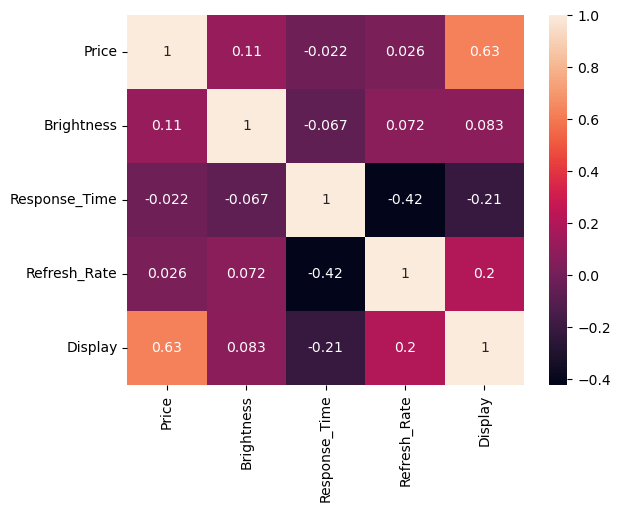

In [252]:
#Correlation heatmap between Price, Brightness, Response_Time, Refresh_Rate, Display.
sns.heatmap(df[['Price','Brightness','Response_Time','Refresh_Rate','Display']].corr(),annot=True)

In [ ]:
#Visualizations

In [258]:
#Bar plot — Top 10 brands by average price.
avg_price = df.groupby('Brands')['Price'].mean().sort_values(ascending=False).head(10)

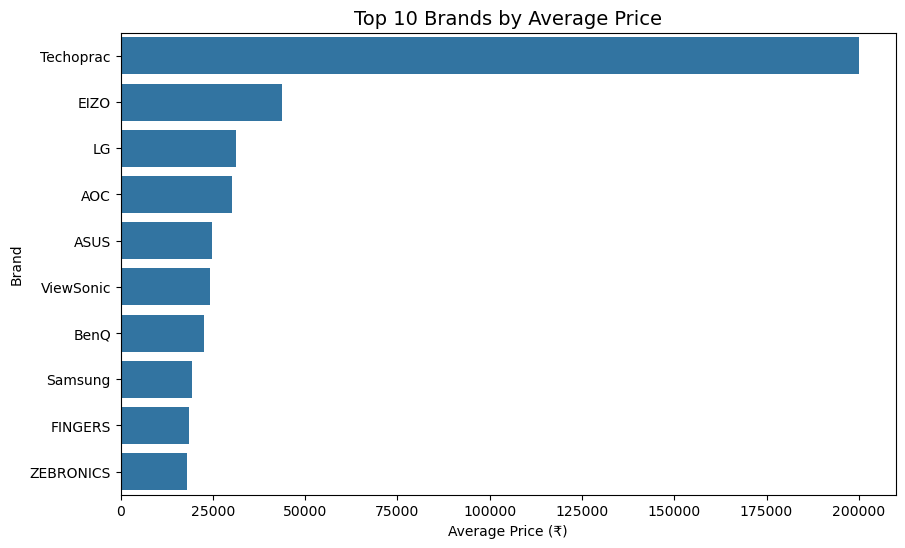

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_price.values, y=avg_price.index)
plt.title("Top 10 Brands by Average Price", fontsize=14)
plt.xlabel("Average Price (₹)")
plt.ylabel("Brand")
plt.show()

<Axes: ylabel='Price'>

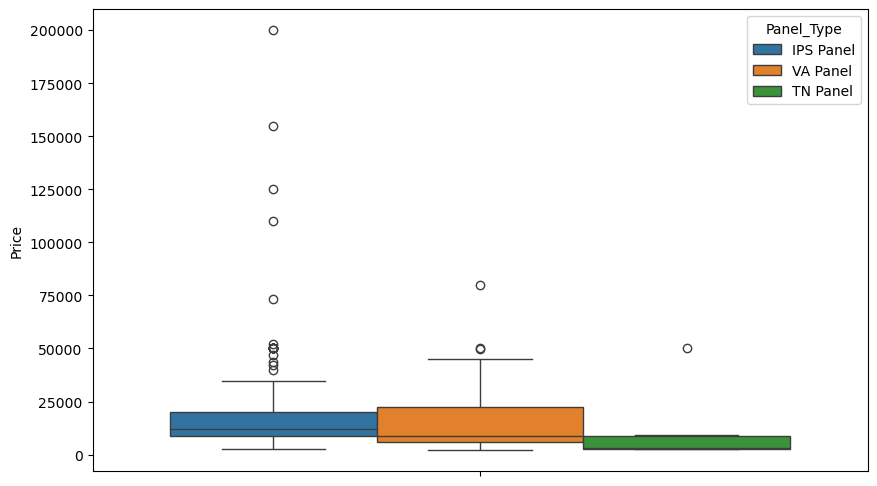

In [265]:
#Boxplot — Price variation across different panel types.
plt.figure(figsize=(10,6))
sns.boxplot(data=df,y='Price',hue='Panel_Type')

<Axes: xlabel='Price', ylabel='Display'>

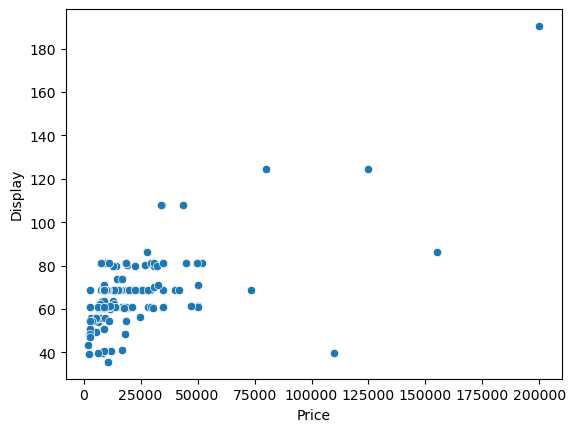

In [266]:
#Scatter plot — Price vs. Display size
sns.scatterplot(data=df,x='Price',y='Display')

In [270]:
#Pie chart — Percentage of each panel type.
vc=df['Panel_Type'].value_counts()
vc


Panel_Type
IPS Panel    164
VA Panel     105
TN Panel      12
Name: count, dtype: int64

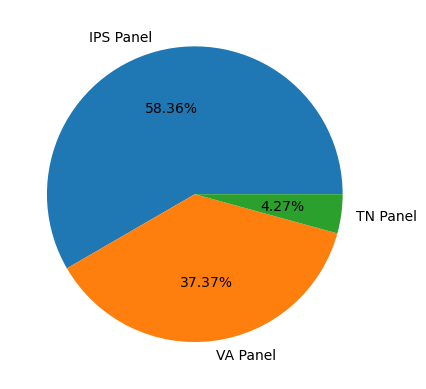

In [272]:
plt.pie(vc.values,labels=vc.index,autopct='%.2f%%')
plt.show()

# Insights / Interpretations

In [ ]:


# IPS panels dominate and are generally higher priced.

# VA panels offer better contrast but lower brightness.

# Higher refresh rate (144Hz+) monitors tend to cost more, showing a positive correlation with price.

# Response time is not strongly correlated with price, meaning faster response monitors don’t always cost more.

# Top brands (Samsung, LG, Dell) dominate the premium segment with Full HD or higher resolutions.

# Budget brands (Frontech, Zebster) focus on HD and VA panels.

# Price Distribution Insight

# The monitor prices are right-skewed, meaning most monitors are budget-friendly, and only a few are premium/high-end.

# Brightness vs Price

# Monitors with brightness above 350 nits generally cost more, showing that brightness level contributes to price but not as strongly as panel type or brand.

# Correlation Insight

# Price shows the strongest positive correlation with display size and brightness, confirming that larger and brighter monitors are generally more expensive.

# Price Stability Across Brands

# Some brands (like DELL) maintain a narrow price range, indicating consistent pricing strategy, while others (like LG) have wide price variation, suggesting diverse product lines.
